# 1. Análise Exploratória de Dados

# 1.2 Medidas - Resumo

São medidas que informam o comportamento das variáveis:

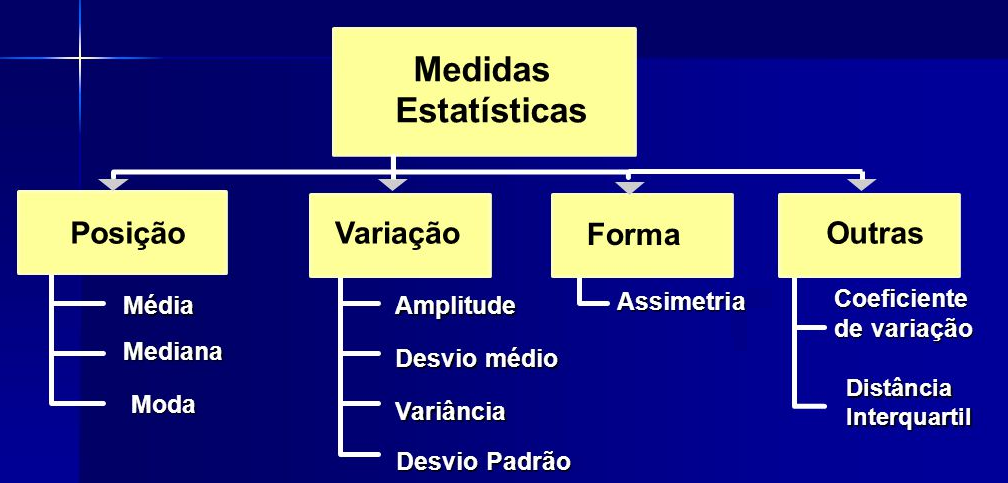

Primeiramente, vamos analisar as medidas estatísticas em **eventos aleatórios**. <br>
Trata-se de eventos cuja ocorrência individual **não obedece a regras ou padrões** que permitam fazer previsões acertadas, como, por exemplo, quais números serão sorteados na loteria.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import math
import statistics 

In [2]:
df = pd.read_csv('C:/Users/Maria Tereza Boada/Desktop/Estatística/datasets/megasena.csv')
df

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2451,05/02/2022,13,51,26,60,31,46
1,2450,02/02/2022,17,39,11,6,15,2
2,2449,29/01/2022,14,49,52,31,20,21
3,2448,27/01/2022,32,48,30,40,35,18
4,2447,25/01/2022,52,13,19,42,49,29
...,...,...,...,...,...,...,...,...
2446,5,08/04/1996,1,19,46,6,16,2
2447,4,01/04/1996,6,59,42,27,1,5
2448,3,25/03/1996,36,30,10,11,29,47
2449,2,18/03/1996,9,39,37,49,43,41


Vou trazer a lista de todos os números sorteados:

In [3]:
df1 = df['bola 1']
df2 = df['bola 2']
df3 = df['bola 3']
df4 = df['bola 4']
df5 = df['bola 5']
df6 = df['bola 6']
frames = [df1, df2, df3, df4, df5, df6]
df_numeros = pd.concat(frames)
df_numeros = pd.Series(df_numeros,
              name="Números")

df_numeros= df_numeros.to_frame()
df_numeros

,Números
0,13
1,17
2,14
3,32
4,52
...,...
2446,2
2447,5
2448,47
2449,41


<AxesSubplot:xlabel='Números', ylabel='count'>

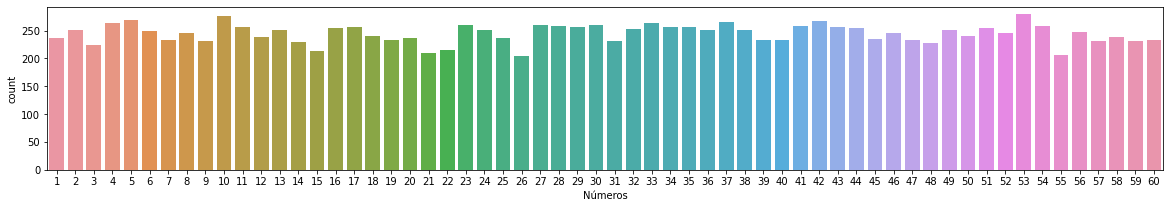

In [4]:
plt.rcParams["figure.figsize"] = (20,3)
sns.countplot(x ='Números', data = df_numeros)

Como os números na mega-sena são sorteados de maneira **aleatória**, cada um deles tem a mesma probabilidade de aparecer (**1/60**), conforme demonstrado acima. A princípio, uma rápida inspeção visual sugere o desenho de uma **distribuição uniforme**.

In [5]:
frequencia = df_numeros['Números'].value_counts()
proporcao = df_numeros['Números'].value_counts(normalize = True)
percentual = df_numeros['Números'].value_counts(normalize = True)*100
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_quantitativas = dist_freq_quantitativas.sort_index()
dist_freq_quantitativas.head(10)

,Frequência,Proporção,Porcentagem(%)
1,237,0.016116,1.611587
2,251,0.017068,1.706786
3,225,0.015300,1.529988
4,264,0.017952,1.795186
5,269,0.018292,1.829185
6,249,0.016932,1.693186
7,234,0.015912,1.591187
8,246,0.016728,1.672787
9,231,0.015708,1.570787
10,277,0.018836,1.883585


A estatística mostra que, apesar de a ocorrência individual destes **eventos aleatórios** ser **imprevisível objetivamente**, é possível tirar algumas conclusões a partir de um **conjunto suficientemente grande** deles.

Para demonstrar esse efeito, vamos criar uma variável para trazer a **média da soma dos números** de um jogo da mega-sena:

In [6]:
df['Média'] = (df['bola 1']+df['bola 2']+df['bola 3']+df['bola 4']+df['bola 5']+df['bola 6'])/6
df

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,Média
0,2451,05/02/2022,13,51,26,60,31,46,37.833333
1,2450,02/02/2022,17,39,11,6,15,2,15.000000
2,2449,29/01/2022,14,49,52,31,20,21,31.166667
3,2448,27/01/2022,32,48,30,40,35,18,33.833333
4,2447,25/01/2022,52,13,19,42,49,29,34.000000
...,...,...,...,...,...,...,...,...,...
2446,5,08/04/1996,1,19,46,6,16,2,15.000000
2447,4,01/04/1996,6,59,42,27,1,5,23.333333
2448,3,25/03/1996,36,30,10,11,29,47,27.166667
2449,2,18/03/1996,9,39,37,49,43,41,36.333333


<AxesSubplot:xlabel='Média', ylabel='count'>

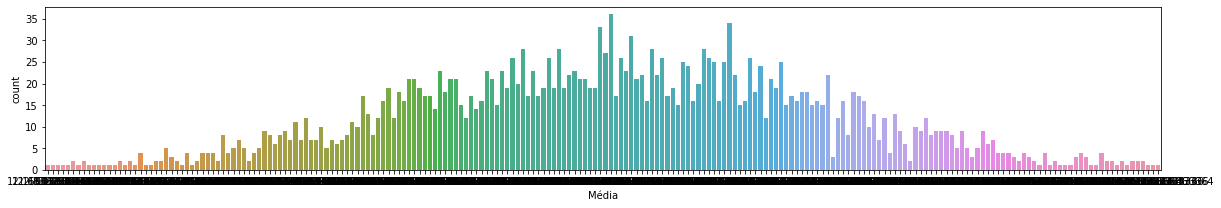

In [7]:
sns.countplot(x ='Média', data = df)

(array([ 28., 107., 316., 501., 616., 524., 259.,  77.,  21.,   2.]),
 array([11.        , 15.41666667, 19.83333333, 24.25      , 28.66666667,
        33.08333333, 37.5       , 41.91666667, 46.33333333, 50.75      ,
        55.16666667]),
 <BarContainer object of 10 artists>)

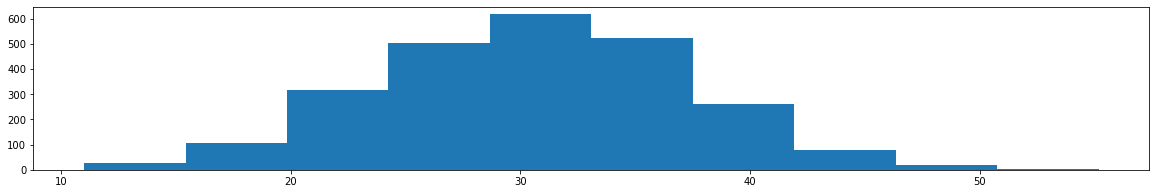

In [8]:
plt.hist(df['Média'])

Observe que obtivemos uma distribuição **normal** (também chamada de gaussiana).

Esse exercício foi uma demonstração do **teorema do limite central**, segundo o qual, as médias de amostras grandes e aleatórias são aproximadamente normais.

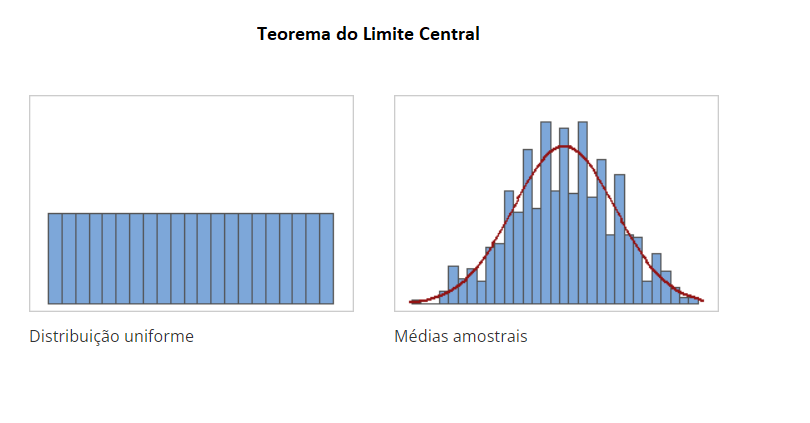

Em uma distribuição normal, a **média** e a **mediana** tendem ao o mesmo valor:

In [9]:
df['Média'].mean()

30.480144158846738

In [10]:
df['Média'].median()

30.5

In [11]:
#para evidenciar a maior ocorrência de números 30 vou trazer a moda a partir da média arredondada
df['Média_Round'] = round(df['Média'],0)
df

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,Média,Média_Round
0,2451,05/02/2022,13,51,26,60,31,46,37.833333,38.0
1,2450,02/02/2022,17,39,11,6,15,2,15.000000,15.0
2,2449,29/01/2022,14,49,52,31,20,21,31.166667,31.0
3,2448,27/01/2022,32,48,30,40,35,18,33.833333,34.0
4,2447,25/01/2022,52,13,19,42,49,29,34.000000,34.0
...,...,...,...,...,...,...,...,...,...,...
2446,5,08/04/1996,1,19,46,6,16,2,15.000000,15.0
2447,4,01/04/1996,6,59,42,27,1,5,23.333333,23.0
2448,3,25/03/1996,36,30,10,11,29,47,27.166667,27.0
2449,2,18/03/1996,9,39,37,49,43,41,36.333333,36.0


In [12]:
df['Média_Round'].mode()

0    30.0
dtype: float64

In [13]:
#Verifique que quanto mais próximo da média mais ocorrências
df['Média_Round'].value_counts()

30.0    172
34.0    163
28.0    149
32.0    143
36.0    131
24.0    129
31.0    123
26.0    118
29.0    113
33.0    113
27.0    103
25.0     97
35.0     96
38.0     90
37.0     86
22.0     72
23.0     67
40.0     61
20.0     60
39.0     46
41.0     43
42.0     42
21.0     36
18.0     35
19.0     28
43.0     22
44.0     17
16.0     15
17.0     15
46.0     12
47.0      9
15.0      9
14.0      8
13.0      7
45.0      5
48.0      5
49.0      4
12.0      3
55.0      1
11.0      1
50.0      1
52.0      1
Name: Média_Round, dtype: int64

Agora, vamos elaborar um **box-plot** para compreender os quartis:

<AxesSubplot:xlabel='Média_Round'>

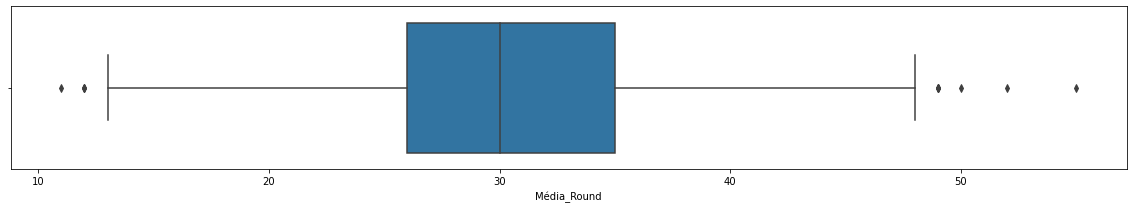

In [14]:
sns.boxplot(x ='Média_Round', data = df) 

**Interpretação**

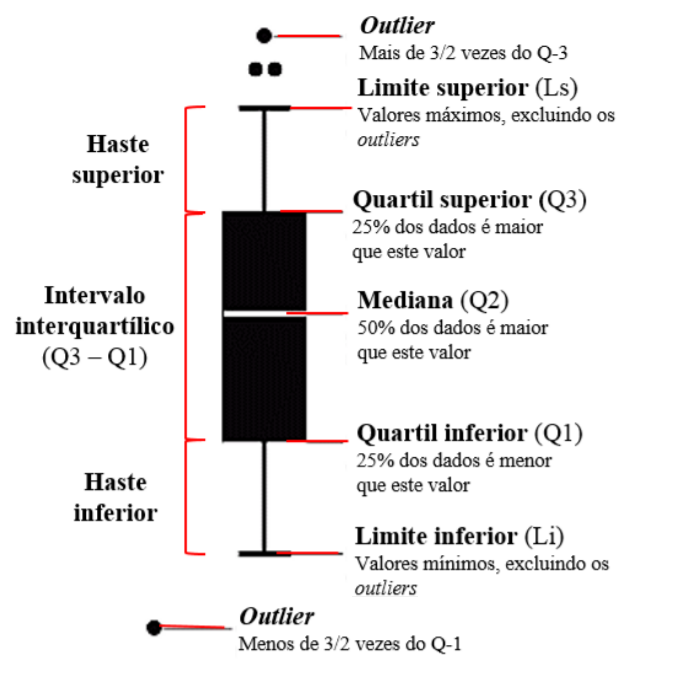

Onde mínimo, Q1, Q2, Q3 e máximo podem ser calculados da seguinte maneira: 

In [15]:
minimo = min(df['Média_Round'])   
Q1 =  np.quantile(df['Média_Round'], 0.25)
Q2 =  np.quantile(df['Média_Round'], 0.50)
Q3 =  np.quantile(df['Média_Round'], 0.75)
maximo = max(df['Média_Round'])    
print(minimo, Q1, Q2, Q3, maximo)

11.0 26.0 30.0 35.0 55.0


**25%** da amostra está entre **11.0** e **26.0** <br>
**50%** da amostra está entre **11.0** e **30.0** <br>
**75%** da amostra está entre **11.0** e **35.0** <br>
**100%** da amostra está entre **11.0** e **55.0** <br>

**Encontrar os outliers utilizando métodos estatísticos**

Esse conceito é importante para tratar uma base que apresente observações muito discrepantes da média, prejudicando as estimativas. Em alguns casos, você poderia optar por excluir os **outliers** da base: <br>

Uma maneira de encontrar **outliers** em uma análise de dados é encontrar a **distribuição estatística** que mais se aproxima à distribuição dos dados e utilizar métodos estatísticos para detectar os pontos discrepantes.

Pela **distribuição normal**, os dados que divergem da média (para cima ou para abaixo) em **duas vezes do desvio-padrão** correspondem a **95,5%** de todos os dados. Os outliers representam, nesta análise **4,5%** da base.

In [21]:
media = df['Média_Round'].mean()
media

30.472460220318236

In [22]:
desv_pad = statistics.stdev(df['Média_Round'])
desv_pad

6.67290870900562

In [25]:
outlier_low = media - 2 * desv_pad 
outlier_low

17.126642802306996

In [26]:
outlier_high = media + 2 * desv_pad 
outlier_high

43.81827763832948

In [27]:
df_final = df.loc[(df['Média_Round'] >= outlier_low) & (df['Média_Round'] <= outlier_high)]
df_final

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,Média,Média_Round
0,2451,05/02/2022,13,51,26,60,31,46,37.833333,38.0
2,2449,29/01/2022,14,49,52,31,20,21,31.166667,31.0
3,2448,27/01/2022,32,48,30,40,35,18,33.833333,34.0
4,2447,25/01/2022,52,13,19,42,49,29,34.000000,34.0
5,2446,22/01/2022,13,58,51,27,1,41,31.833333,32.0
...,...,...,...,...,...,...,...,...,...,...
2445,6,15/04/1996,19,40,7,13,22,47,24.666667,25.0
2447,4,01/04/1996,6,59,42,27,1,5,23.333333,23.0
2448,3,25/03/1996,36,30,10,11,29,47,27.166667,27.0
2449,2,18/03/1996,9,39,37,49,43,41,36.333333,36.0


A saber, todos os dados que foram excluídos da base final:

In [30]:
#outliers abaixo 
df_outliers_low = df.loc[(df['Média_Round'] < outlier_low)]
df_outliers_low.head(10)

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,Média,Média_Round
1,2450,02/02/2022,17,39,11,6,15,2,15.000000,15.0
8,2443,12/01/2022,31,1,12,13,5,17,13.166667,13.0
34,2417,09/10/2021,3,11,27,46,7,10,17.333333,17.0
37,2414,30/09/2021,4,14,29,6,5,38,16.000000,16.0
75,2376,29/05/2021,22,12,17,18,19,14,17.000000,17.0
187,2264,23/05/2020,29,19,8,2,37,3,16.333333,16.0
193,2258,05/05/2020,26,7,1,23,14,5,12.666667,13.0
225,2226,21/01/2020,2,7,38,30,4,16,16.166667,16.0
320,2131,06/03/2019,28,18,20,6,2,3,12.833333,13.0
341,2110,31/12/2018,25,33,10,12,18,5,17.166667,17.0


In [32]:
#outliers acima 
df_outliers_high = df.loc[(df['Média_Round'] > outlier_high)]
df_outliers_high.head(10)

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6,Média,Média_Round
22,2429,17/11/2021,60,11,56,37,53,55,45.333333,45.0
46,2405,01/09/2021,21,38,59,53,49,48,44.666667,45.0
124,2327,12/12/2020,54,45,30,57,37,58,46.833333,47.0
126,2325,08/12/2020,33,37,60,34,46,52,43.666667,44.0
133,2318,14/11/2020,54,58,52,28,44,60,49.333333,49.0
201,2250,08/04/2020,39,52,27,57,58,33,44.333333,44.0
213,2238,29/02/2020,57,36,11,58,55,45,43.666667,44.0
239,2212,30/11/2019,51,58,53,52,26,23,43.833333,44.0
399,2052,23/06/2018,57,50,56,51,58,59,55.166667,55.0
408,2043,23/05/2018,53,58,21,38,57,56,47.166667,47.0
